# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import pydotplus
from IPython.display import Image  

#### Dataset as 21 features and 2000 entries. The meanings of the features are given below.

* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Byte
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
* price_range: This is the target variable with value of 0(low medium  cost), 1(above medium cost)

# Read the Data


In [3]:
df =  pd.read_csv('mobile_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [4]:
df.shape

(2000, 21)

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.std()

battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
three_g             0.426273
touch_screen        0.500116
wifi                0.500076
price_range         0.500125
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.price_range.value_counts()

1    1000
0    1000
Name: price_range, dtype: int64

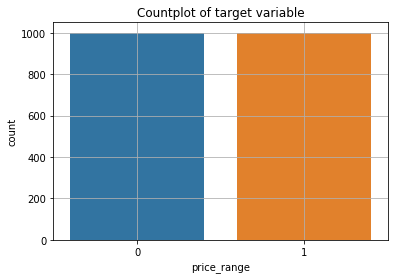

In [9]:
#Ploting  the distribution of the target variable.
sns.countplot(df['price_range'])
plt.title("Countplot of target variable")
plt.grid(True)
plt.show()

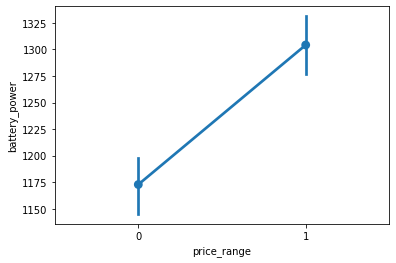

In [10]:
sns.pointplot(x='price_range',y='battery_power',data=df)

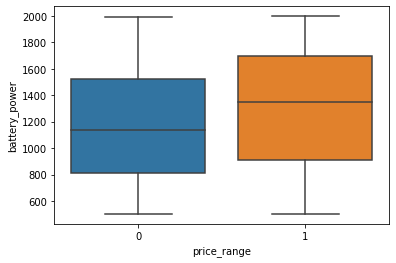

In [11]:
sns.boxplot(x='price_range',y='battery_power',data=df)


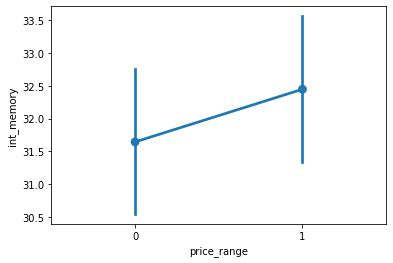

In [12]:
sns.pointplot(x='price_range',y='int_memory',data=df)


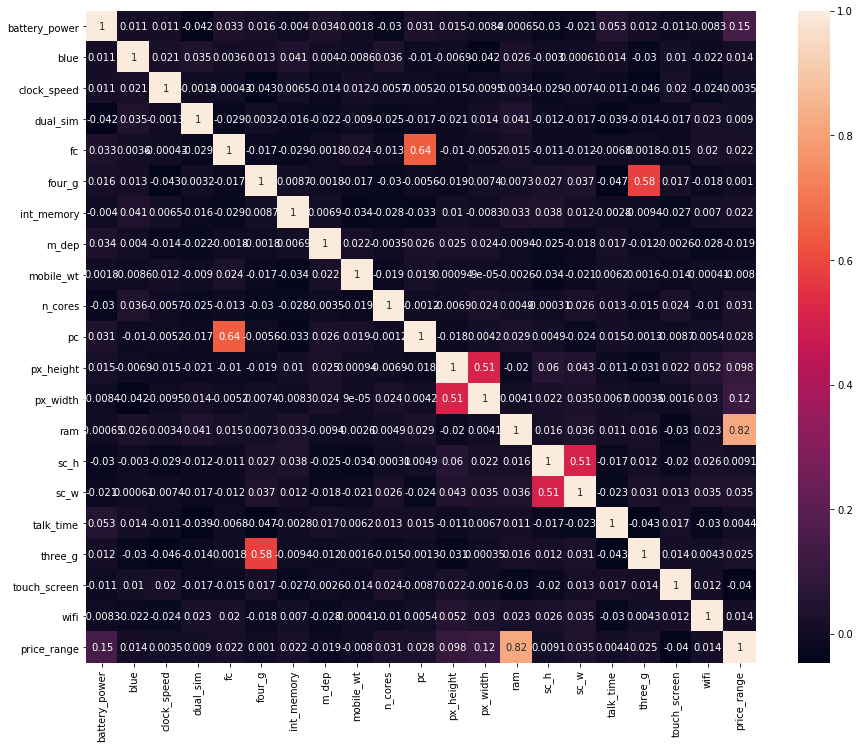

In [13]:
fig = plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

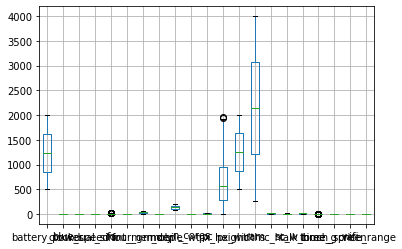

In [14]:
# Ploting a box plot to detect the outlair

df.boxplot()

In [15]:
# Outlair Detaction using IQR method
Q1 = df.drop(['price_range'], axis=1).quantile(0.25)

Q3 = df.drop(['price_range'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
dtype: float64


In [16]:
df.shape

(1506, 21)

In [17]:
df.std()

battery_power     439.152661
blue                0.499972
clock_speed         0.813850
dual_sim            0.500138
fc                  4.215837
four_g              0.464831
int_memory         18.218391
m_dep               0.287849
mobile_wt          35.143590
n_cores             2.276619
pc                  6.059893
px_height         435.280087
px_width          428.973230
ram              1084.554839
sc_h                4.213579
sc_w                4.417835
talk_time           5.433910
three_g             0.000000
touch_screen        0.500130
wifi                0.500138
price_range         0.500122
dtype: float64

### Confusion matrix (heatmap)  roc-auc curve.


In [1]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for mobile price ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)




In [20]:
from matplotlib.colors import ListedColormap
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

# Model creation


#### Standard Scalar for Naive_bayes and KNN.


In [21]:
df_target = df['price_range']
X = df.drop('price_range', axis = 1)

In [22]:
ss = StandardScaler()

num_scaled = ss.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_scaled, df_target, test_size=0.25, random_state=123,stratify=df_target)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 1129
Testing size = 377


# Naive_bayes


In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_test_pred1 = gnb.predict(X_test)
y_train_pred1=gnb.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Test Set Accuracy:94.42970822281167

Confusion Matrix:
[[177  12]
 [  9 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       189
           1       0.94      0.95      0.94       188

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



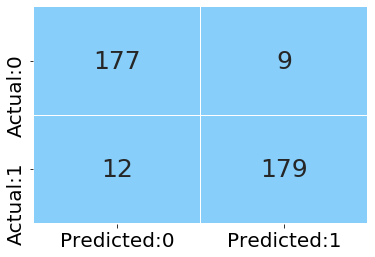

In [25]:
plot_confusion_matrix(gnb)

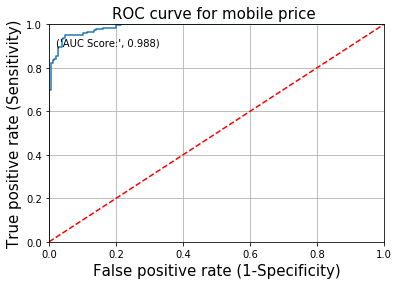

In [26]:
plot_roc(gnb)

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=44)

knn.fit(X_train,y_train)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Test Set Accuracy:90.18567639257294

Confusion Matrix:
[[169  20]
 [ 17 171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       189
           1       0.90      0.91      0.90       188

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377



In [78]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid)

Best parameters for KNN Classifier:  GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')


In [79]:
knn_grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 23}

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=23,metric= 'manhattan')

knn.fit(X_train,y_train)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Test Set Accuracy:91.77718832891246

Confusion Matrix:
[[174  19]
 [ 12 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       193
           1       0.90      0.93      0.92       184

    accuracy                           0.92       377
   macro avg       0.92      0.92      0.92       377
weighted avg       0.92      0.92      0.92       377



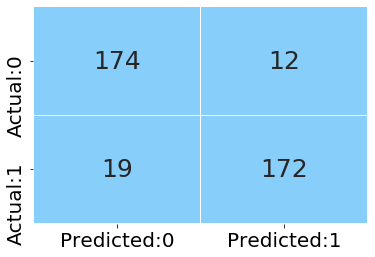

In [29]:
plot_confusion_matrix(knn)

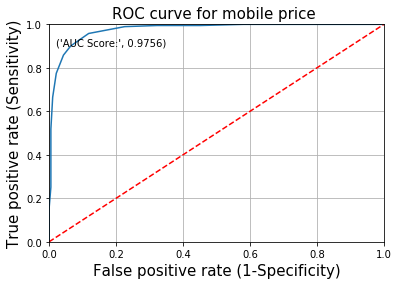

In [30]:
plot_roc(knn)

# LOGISTIC REGRESSION


In [31]:
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Test Set Accuracy:97.87798408488064

Confusion Matrix:
[[181   3]
 [  5 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.98      0.97      0.98       193

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



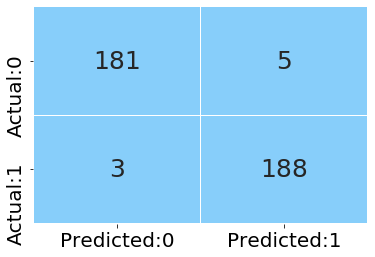

In [32]:
plot_confusion_matrix(lr)

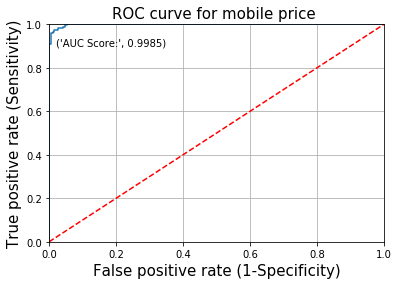

In [33]:
plot_roc(lr)

### Split again for Unscaled data

In [34]:
df_target = df['price_range']
x = df.drop('price_range', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, df_target, test_size=0.25, random_state=123,stratify=df_target)
print("Training size = " + str(x_train.shape[0]))
print("Testing size = " + str(x_test.shape[0]))

Training size = 1129
Testing size = 377


In [35]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(x_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

# DECISION TREE


In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train)

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Test Set Accuracy:94.6949602122016

Confusion Matrix:
[[179  13]
 [  7 178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       192
           1       0.93      0.96      0.95       185

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



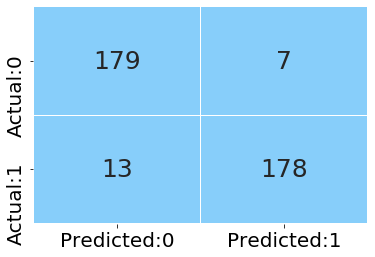

In [37]:
plot_confusion_matrix(dtc)

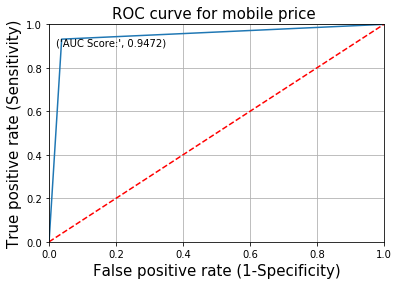

In [38]:
plot_roc(dtc)

In [39]:
import pydotplus
from IPython.display import Image
import graphviz

In [40]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

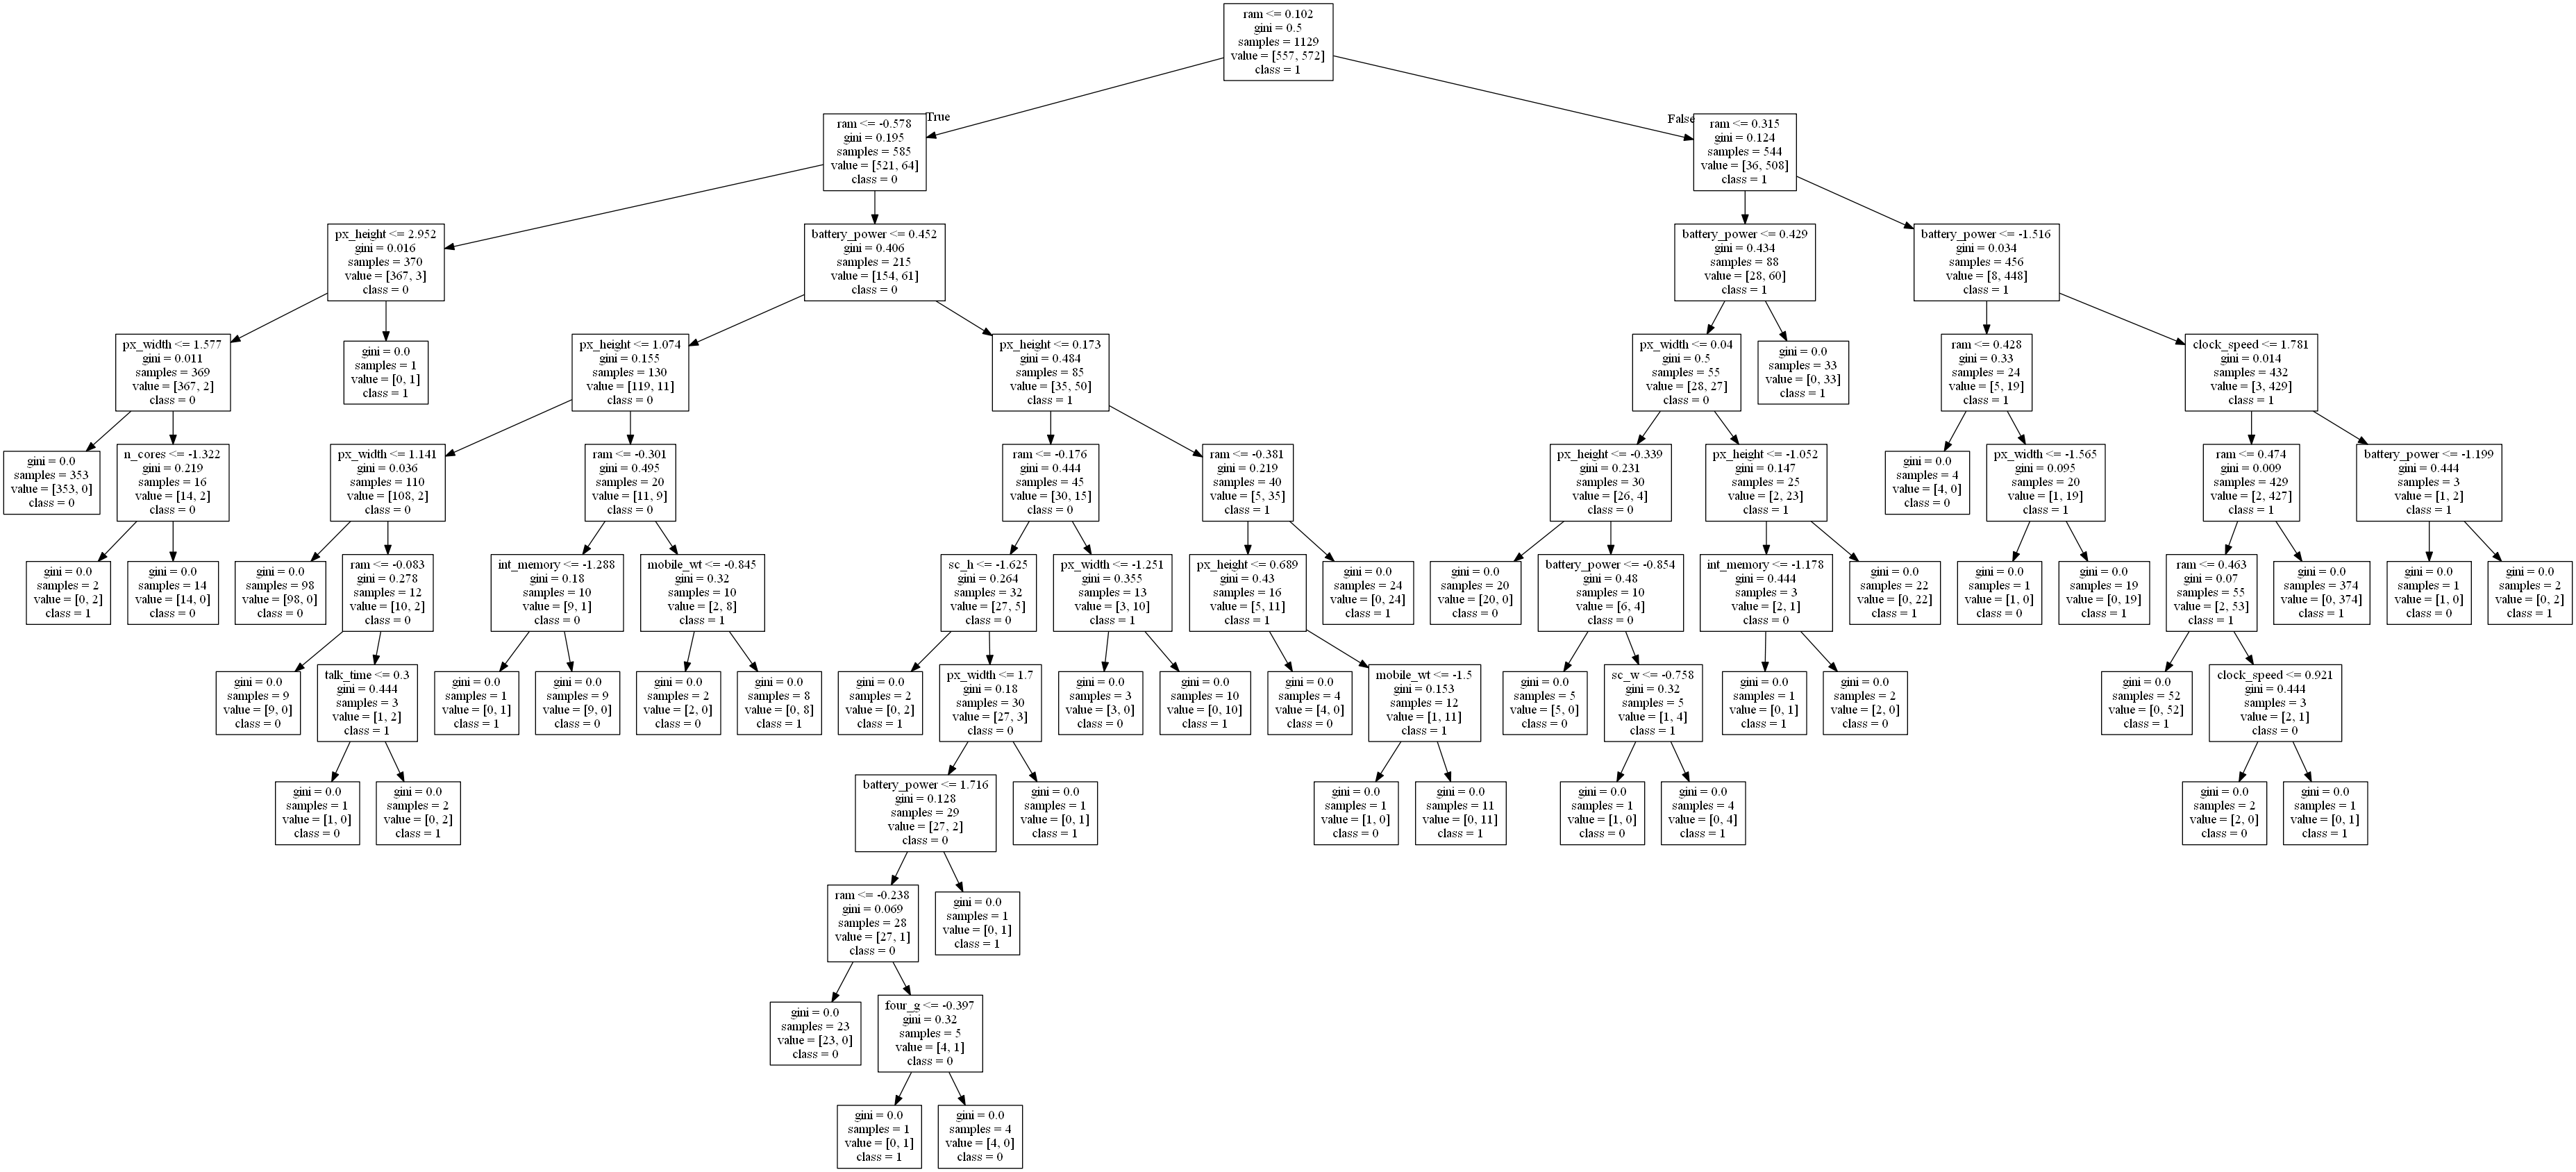

In [41]:
labels = x_train.columns


dot_data = tree.export_graphviz(dtc, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

# Random Forest


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_test_pred3 = rf.predict(X_test)
y_train_pred3=rf.predict(X_train)

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Test Set Accuracy:94.6949602122016

Confusion Matrix:
[[180  14]
 [  6 177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       194
           1       0.93      0.97      0.95       183

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



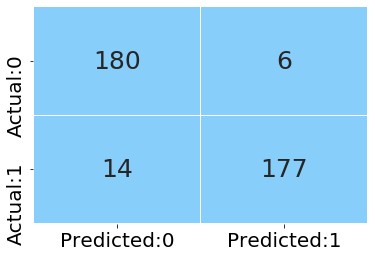

In [43]:
plot_confusion_matrix(rf)

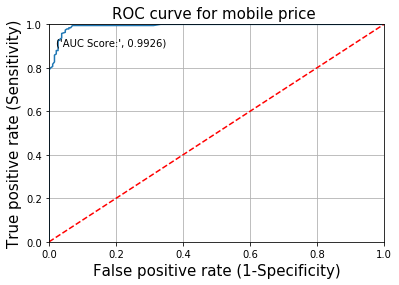

In [44]:
plot_roc(rf)

In [45]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=cm[1,1]/(cm[1,1]+cm[0,1])
print(precision)
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])

print(sensitivity)

0.9725274725274725
0.9267015706806283


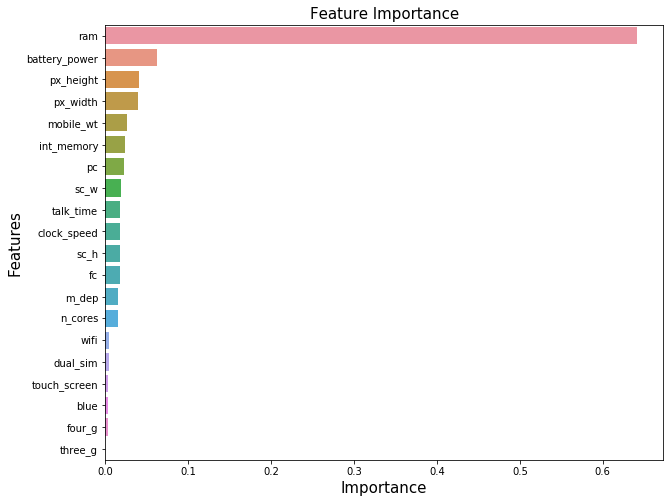

In [46]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(10,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# XGBoost

In [47]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,verbosity=0)
xgb_model.fit(x_train, y_train)
y_test_pred6 = xgb_model.predict(x_test)
y_train_pred6=xgb_model.predict(x_train)
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Test Set Accuracy:97.34748010610079

Confusion Matrix:
[[183   7]
 [  3 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       190
           1       0.96      0.98      0.97       187

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



In [50]:
xgb_model = XGBClassifier()
score=cross_val_score(xgb_model, x_train, y_train, cv=10)
score=score.mean()
print("Accuracy after 10 fold cross validation:", score)

Accuracy after 10 fold cross validation: 0.9663558786346398


# AdaBoostClassifier

In [51]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(x_train, y_train)
y_test_pred4 = ada_model.predict(x_test)
y_train_pred4=ada_model.predict(x_train)
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Test Set Accuracy:97.87798408488064

Confusion Matrix:
[[184   6]
 [  2 185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.97      0.99      0.98       187

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



In [52]:
ada_model = AdaBoostClassifier()
score1=cross_val_score(ada_model, x_train, y_train, cv=10)
score1=score1.mean()
print("Accuracy after 10 fold cross validation:", score1)

Accuracy after 10 fold cross validation: 0.970772756005057


# GradientBoostingClassifier

In [53]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(x_train, y_train)
y_test_pred5 = gboost_model.predict(x_test)
y_train_pred5=gboost_model.predict(x_train)
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Test Set Accuracy:94.9602122015915

Confusion Matrix:
[[179  12]
 [  7 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       191
           1       0.94      0.96      0.95       186

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



In [54]:
gboost_model = GradientBoostingClassifier()
score2=cross_val_score(gboost_model, x_train, y_train, cv=10)
score2=score2.mean()
print("Accuracy after 10 fold cross validation:", score2)

Accuracy after 10 fold cross validation: 0.9672329329962073


## Best performing models


In [55]:
scores = [['Gaussian Naive Bayes', gnb_score],
          ['K-Nearest Neighbor', knn_score],
          ['Logistic Regression', lr_score],
          ['Decision Tree', dt_score],
          ['Random Forest', rf_score],
         ['XGB Classifier',score],
         ['AdaBoost Classifier',score1],
         ['Gradient Boosting Classifier',score2]]
 

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

NameError: name 'gnb_score' is not defined